# Task 3

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

**UPDATE THIS LINK**

https://github.com/carmengg/eds-220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Acknowledgments

This exercise is based on this [NCEAS Learning Hub R lesson](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).

Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.

## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed here at KNB:

 [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886- 1997). Gulf of Alaska Data Portal. df35b.304.2.](https://knb.ecoinformatics.org/view/df35b.304.2)

The dataset is in a csv file in the homework's repo (salmon_data.csv) and has the following columns:

- Region: region code
- Year: year fish were caught
- notesRegCode: notes and comments
- Species: species of salmon caught
- Catch: commercial catches of salmon species (in tousands of fish)


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Average Salmon Caught by Region'}, xlabel='Region', ylabel='Catch (thousands of fish)'>

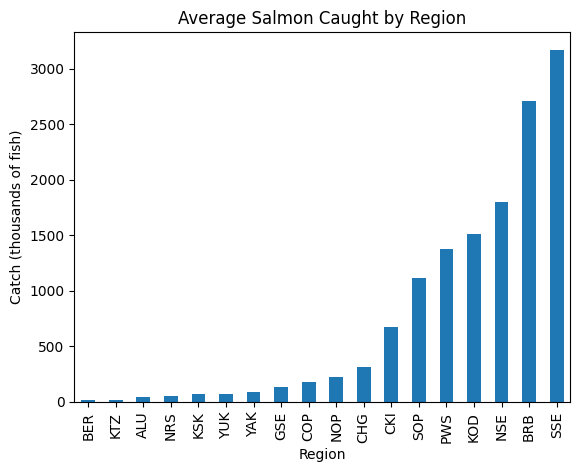

In [53]:
### ===== FINAL CODE =====
# Import relevant packages
import pandas as pd

#Import the data
catch_original = pd.read_csv('salmon_data.csv')

#remove notesRegCode column
catch_original = catch_original.drop(columns = ['notesRegCode'])

# Filter the catch column for vules equals i
catch_original.loc[catch_original.Catch == 'I']

# Access the row and update it
catch_original.at[400, 'Catch'] = 1

#Change the type
catch_original.Catch = catch_original.Catch.astype('int64')

#Filter to a certain time period
catch_data = catch_original[catch_original['Year'].isin(range(1878,1997))]
#sort the variable and take the averages per region
plot_catch_data = catch_data.groupby("Region").Catch.mean().sort_values()
# Plot the Data above using plot
plot_catch_data.plot(kind = 'bar',
                     title = 'Average Salmon Caught by Region',
                    ylabel = 'Catch (thousands of fish)')


## 1

Import the data from the `salmon_data.csv` as `catch_original` and look at the head of the dataframe.

In [18]:
# Import relevant packages
import pandas as pd

#Import the data
catch_original = pd.read_csv('salmon_data.csv')
catch_original.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


## 2
In the next cell:
1. Print the unique values (not the number of unique values) of the `notesRegCode` column. 
2. Update the dataframe so it doesn't have the `notesRegCode` column.
3. Verify the column is no longer in the dataframe.

In [19]:
# use the .unique() function to get unique values of notesRegCode column
catch_original.notesRegCode.unique()

#remove that column
catch_original = catch_original.drop(columns = ['notesRegCode'])

#check if the column dropped
catch_original.head()

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


## 3
In the next cell, check the data types of the columns. Does each column have the expected data type? Write your answer as a short comment in the same cell.


In [20]:
# check the datatypes
catch_original.dtypes

# ANSWER: The region and the Species column are what I would expec them to be but 
#it would be ideal if the year column was a date and the catch column was an integer

Region     object
Year        int64
Species    object
Catch      object
dtype: object

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`.

Run the next cell and read the end of the error message closely.

In [21]:
# to use `astype` we select a specifc column
#  and then indicate the dtype we want to convert to
#  astype does not modify the column in place
catch_original.Catch.astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out this data set is from a PDF which was automatically converted into a csv and this value of 'I' is actually a 1.

In the next cell find the row(s) that is causing this issue. Show the filtered row(s) as the output.

In [54]:
# Filter the catch column for vules equals i
catch_original.loc[catch_original.Catch == 'I']

,Region,Year,Species,Catch


## 6
In the next cell:

1. Update the value of I to 1. HINT: you could use the `at` method to access a single value in the dataframe.
2. Access the row you updated to verify the value was changed.

In [23]:
# Access the row and update it
catch_original.at[400, 'Catch'] = 1

#Access the row to see it was changed
catch_original.iloc[400,]

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

## 7
In the next cell:

1. Update the Catch column in `catch_data` to be of type `int64`.
2. Check the dtypes of the columns.

In [24]:
#Change the type
catch_original.Catch = catch_original.Catch.astype('int64')

#Check using dtypes
catch_original.dtypes

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

## 8
Create a dataframe with the average catch per region. HINT: use `groupby()`. Store your dataframe in new variable.


In [33]:
# Data Wrangling to get the average catch per region
catch_original.groupby("Region").Catch.mean()

Region
ALU      40.383908
BER      16.372549
BRB    2709.796491
CHG     315.487273
CKI     683.571429
COP     179.223404
GSE     133.841463
KOD    1528.350000
KSK      67.642353
KTZ      18.836145
NOP     229.493478
NRS      51.502703
NSE    1825.020870
PWS    1419.236697
SOP    1110.942222
SSE    3184.660714
YAK      91.922917
YUK      68.645570
Name: Catch, dtype: float64

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<AxesSubplot:title={'center':'Average Salmon Caught by Region'}, xlabel='Region', ylabel='Catch (thousands of fish)'>

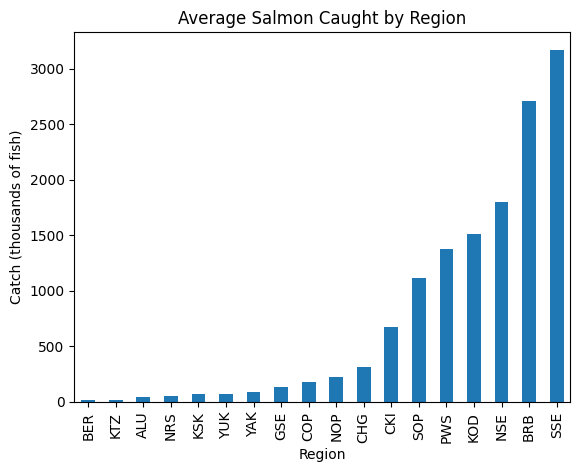

In [51]:
#Filter to a certain time period
catch_data = catch_original[catch_original['Year'].isin(range(1878,1997))]
#sort the variable and take the averages per region
plot_catch_data = catch_data.groupby("Region").Catch.mean().sort_values()
# Plot the Data above using plot
plot_catch_data.plot(kind = 'bar',
                     title = 'Average Salmon Caught by Region',
                    ylabel = 'Catch (thousands of fish)')

## 10

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.